In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Define a general rectangular pulse function
def rect(t, start, end):
    return np.where((t >= start) & (t <= end), 1, 0)

# Define the delta function
def delta(t, t0):
    delta_signal = np.zeros_like(t)
    index = np.argmin(np.abs(t - t0))  # Find the closest index to t0
    delta_signal[index] = 1
    return delta_signal



### Modes of `np.convolve`:

**'full'**: This computes the convolution at all possible points of overlap between the two input signals. The result is the longest possible output, where the length is $ (N + M - 1) $, where $ N $ and $ M $ are the lengths of the two input signals. It captures the convolution over the entire time range, including the partial overlap of the signals.

**'same'**: This option returns a result that has the same length as the input signal $ x(t) $, centered around where the two signals fully overlap. This is typically used when you want the output to match the size of one of the inputs.

**'valid'**: This computes the convolution only where the signals completely overlap, discarding the parts where they do not fully overlap. The result is shorter than the input signals.


----
### NOTE: 

In the convolution process below, the comment **"scale by the time step"** refers to the fact that when we numerically approximate the convolution using discrete time steps (as we do in simulations with arrays), we need to account for the time step size to ensure that the result is accurate.

### Here's why:

1. **Discrete Convolution**: In continuous time, convolution is defined as an integral:
   $$
   (x * h)(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau
   $$
   When we approximate this in discrete time (i.e., with arrays or sampled data), the convolution becomes a sum:
   $$
   (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k]
   $$
   But in practice, we don't have an infinite number of samples, so we sum over a finite range.

2. **Time Step Scaling**: If we assume that the time axis is sampled at intervals of $ \Delta t $ (time step), the continuous integral becomes a discrete sum, and the integral must be scaled by the size of the time step $ \Delta t $. This step ensures that the discrete approximation of the convolution is consistent with the continuous-time definition.

   In code, this is done by multiplying the result of the discrete convolution by $ \Delta t $, where $ \Delta t $ is the difference between consecutive time points in the array (in your case, it's $ t[1] - t[0] $).

### In summary:

The **"scale by the time step"** ensures that the discrete approximation correctly accounts for the sampling rate or resolution of the time axis. Without this, the convolution result would be off by a factor proportional to the time step size.


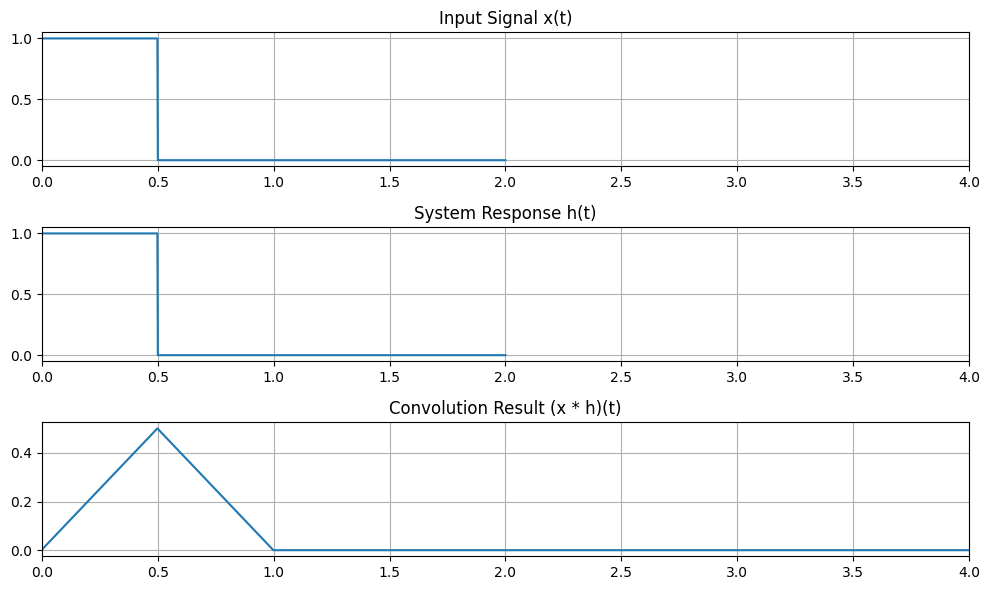

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis
t = np.linspace(0, 2, 1000)

# Signals x(t) and h(t) as rectangular pulses
x_t = rect(t, 0, 0.5)
h_t = rect(t, 0, 0.5)

# Perform convolution
convolution_result = np.convolve(x_t, h_t, mode='full') * (t[1] - t[0])  # scale by the time step
conv_t = np.linspace(0, 2 * (t[-1] - t[0]), len(convolution_result))  # Time axis for the convolution result

# Plot the signals and the convolution result
plt.figure(figsize=(10, 6))

# Plot x(t)
plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="x(t)")
plt.title("Input Signal x(t)")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Plot h(t)
plt.subplot(3, 1, 2)
plt.plot(t, h_t, label="h(t)")
plt.title("System Response h(t)")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Plot the convolution result
plt.subplot(3, 1, 3)
plt.plot(conv_t, convolution_result, label="(x * h)(t)")
plt.title("Convolution Result (x * h)(t)")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Show the plot
plt.tight_layout()
plt.show()


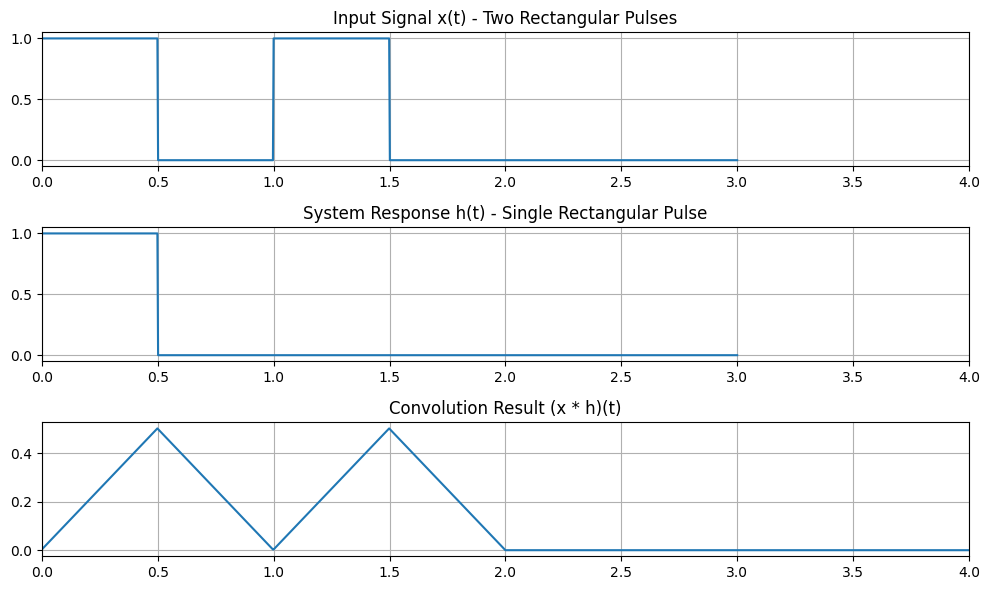

In [112]:

# Generate the time axis
t = np.linspace(0, 3, 1000)

# Create the input signal as the sum of two rectangular pulses
x_t = rect(t, 0, 0.5) + rect(t, 1, 1.5)
# Define the system response (h(t)) as a single rectangular pulse
h_t = rect(t, 0, 0.5)

# Perform convolution
convolution_result = np.convolve(x_t, h_t, mode='full') * (t[1] - t[0])
conv_t = np.linspace(0, 2 * (t[-1] - t[0]), len(convolution_result))

# Plot the signals and the convolution result
plt.figure(figsize=(10, 6))

# Plot x(t)
plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="x(t)")
plt.title("Input Signal x(t) - Two Rectangular Pulses")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Plot h(t)
plt.subplot(3, 1, 2)
plt.plot(t, h_t, label="h(t)")
plt.title("System Response h(t) - Single Rectangular Pulse")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Plot the convolution result
plt.subplot(3, 1, 3)
plt.plot(conv_t, convolution_result, label="(x * h)(t)")
plt.title("Convolution Result (x * h)(t)")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Show the plot
plt.tight_layout()
plt.show()


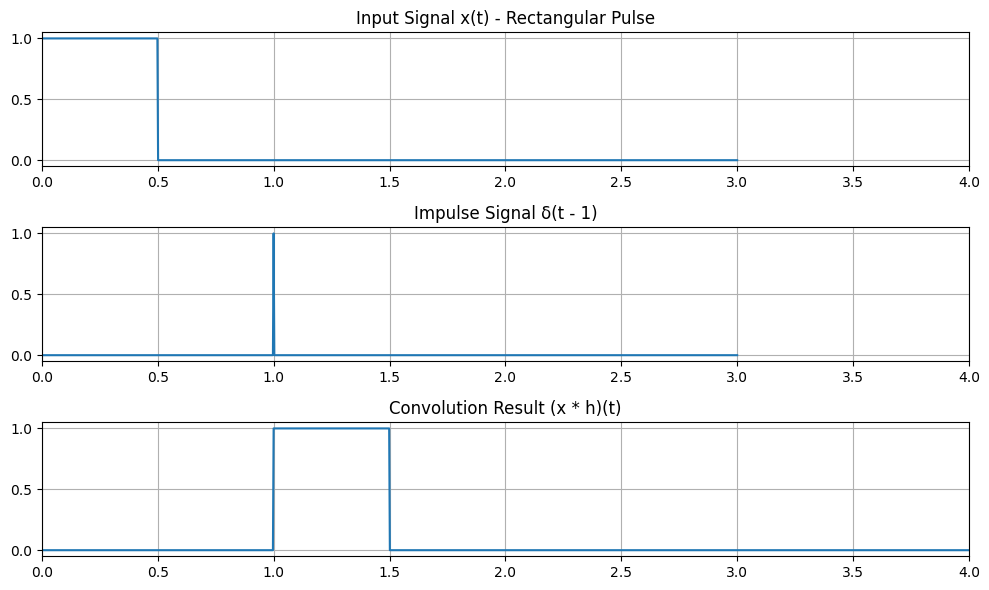

In [122]:
# Generate the time axis
t = np.linspace(0, 3, 1000)

# Define the rectangular pulse between 0 and 0.5
x_t_rect = rect(t, 0, 0.5)

# Define the delta function shifted to t=1
delta_t = delta(t, 1)

# Perform the convolution (this will just shift the rectangular pulse by 1)
# Be careful: You should not used `t[-1] - t[0]` scaling in this case as it is inherent in the integral of the delta function
convolution_result = np.convolve(x_t_rect, delta_t, mode='full') 
conv_t = np.linspace(0, 2 * (t[-1] - t[0]), len(convolution_result))

# Plot the signals and the convolution result
plt.figure(figsize=(10, 6))

# Plot x(t)
plt.subplot(3, 1, 1)
plt.plot(t, x_t_rect, label="x(t) - Rectangular Pulse")
plt.title("Input Signal x(t) - Rectangular Pulse")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Plot delta(t - 1)
plt.subplot(3, 1, 2)
plt.plot(t, delta_t, label="δ(t - 1)")
plt.title("Impulse Signal δ(t - 1)")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Plot the convolution result
plt.subplot(3, 1, 3)
plt.plot(conv_t, convolution_result, label="(x * h)(t)")
plt.title("Convolution Result (x * h)(t)")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Show the plot
plt.tight_layout()
plt.show()


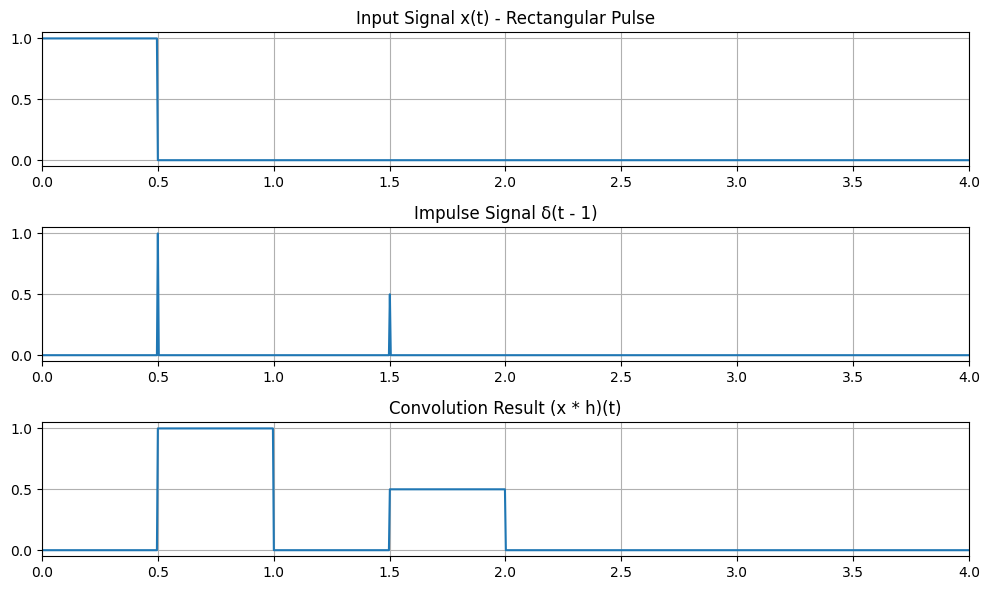

In [123]:
# Generate the time axis
t = np.linspace(0, 4, 1000)

# Define the rectangular pulse between 0 and 0.5
x_t = rect(t, 0, 0.5)

# Define the delta function shifted to t=1
delta_t = delta(t, 0.5) + 0.5 * delta(t, 1.5)

# Perform the convolution (this will just shift the rectangular pulse by 1)
# Be careful: You should not used `t[-1] - t[0]` scaling in this case (when we work with delta functions) as it is inherent in the integral of the delta function
convolution_result = np.convolve(x_t, delta_t, mode='full')
conv_t = np.linspace(0, 2 * (t[-1] - t[0]), len(convolution_result))

# Plot the signals and the convolution result
plt.figure(figsize=(10, 6))

# Plot x(t)
plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="x(t) - Rectangular Pulse")
plt.title("Input Signal x(t) - Rectangular Pulse")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Plot delta(t - 1) + 0.5 * delta(t - 3)
plt.subplot(3, 1, 2)
plt.plot(t, delta_t, label="δ(t - 1)")
plt.title("Impulse Signal δ(t - 1)")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Plot the convolution result
plt.subplot(3, 1, 3)
plt.plot(conv_t, convolution_result, label="(x * h)(t)")
plt.title("Convolution Result (x * h)(t)")
plt.grid(True)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4.5, 0.5))  # Set ticks from 0 to 4

# Show the plot
plt.tight_layout()
plt.show()
